<a href="https://colab.research.google.com/github/Akshaykj2000/WEBLAB/blob/main/P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
!pip install kmodes


In [2]:
df = pd.read_csv('/content/final_dataset.csv')
df.head(2)

,URL,SHOP_NAME,RATING,REVIEW_COUNT,LOCATION,TYPE,PLACE,IMG_SRC,Latitude,Longitude
0,https://www.google.com/maps/place/Sanjoe+Resta...,Sanjoe Restaurant,3.9,"-1,051",Kochi,Indian,"Carmel Buildings, Banerji Rd",https://lh5.googleusercontent.com/p/AF1QipPG8Z...,9.985559,76.279874
1,https://www.google.com/maps/place/Coriander+Ve...,Coriander Veg & Vegan Restaurant,4.7,-177,Kochi,Indian,"1/754A, Napier Street",https://lh5.googleusercontent.com/p/AF1QipPxWE...,9.964320,76.239095


In [3]:
df.isna().sum()

URL              0
SHOP_NAME        0
RATING          99
REVIEW_COUNT    99
LOCATION         0
TYPE             0
PLACE           66
IMG_SRC          0
Latitude         0
Longitude        0
dtype: int64

In [4]:

df['REVIEW_COUNT'].fillna('0', inplace=True)
df['REVIEW_COUNT'] = df['REVIEW_COUNT'].str.replace(',', '', regex=True)

df['REVIEW_COUNT'] = df['REVIEW_COUNT'].str.replace('-', '')
df.head(5)

,URL,SHOP_NAME,RATING,REVIEW_COUNT,LOCATION,TYPE,PLACE,IMG_SRC,Latitude,Longitude
0,https://www.google.com/maps/place/Sanjoe+Resta...,Sanjoe Restaurant,3.9,1051,Kochi,Indian,"Carmel Buildings, Banerji Rd",https://lh5.googleusercontent.com/p/AF1QipPG8Z...,9.985559,76.279874
1,https://www.google.com/maps/place/Coriander+Ve...,Coriander Veg & Vegan Restaurant,4.7,177,Kochi,Indian,"1/754A, Napier Street",https://lh5.googleusercontent.com/p/AF1QipPxWE...,9.964320,76.239095
2,https://www.google.com/maps/place/Drawing+Room...,Drawing Room,4.0,381,Kochi,Restaurant,"39/3825, Alappat Cross Rd",https://lh5.googleusercontent.com/p/AF1QipNFUi...,9.957046,76.292381
3,https://www.google.com/maps/place/Ojeen+Restau...,Ojeen Restaurant,4.0,865,Kochi,Keralan,"X7HH+326, Broadway",https://lh5.googleusercontent.com/p/AF1QipMRsG...,9.977668,76.277524
4,https://www.google.com/maps/place/Let%27s+Kimc...,Let's Kimchi,4.5,148,Kochi,Korean,"8/194 A2 Santom, Santo Gopalan Rd, opposite wa...",https://lh5.googleusercontent.com/p/AF1QipNfpo...,9.951308,76.253190


In [ ]:
df['RATING'].fillna(df['RATING'].median(),inplace=True)
df['REVIEW_COUNT'].fillna(df['REVIEW_COUNT'].median(),inplace=True)


<Axes: xlabel='LOCATION'>

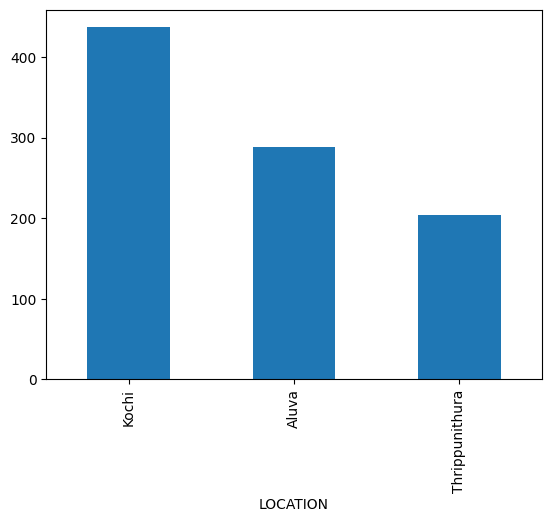

In [5]:
group = df.groupby('LOCATION').size()
cities=group.sort_values(ascending=False).head(3)
cities.plot.bar()

In [44]:
df['Kochi'] = df['LOCATION'].str.contains('Kochi')
df= df.loc[df.Kochi == True]
df.head(2)

,URL,SHOP_NAME,RATING,REVIEW_COUNT,LOCATION,TYPE,PLACE,IMG_SRC,Latitude,Longitude,Kochi
0,https://www.google.com/maps/place/Sanjoe+Resta...,Sanjoe Restaurant,3.9,1051,Kochi,Indian,"Carmel Buildings, Banerji Rd",https://lh5.googleusercontent.com/p/AF1QipPG8Z...,9.985559,76.279874,True
1,https://www.google.com/maps/place/Coriander+Ve...,Coriander Veg & Vegan Restaurant,4.7,177,Kochi,Indian,"1/754A, Napier Street",https://lh5.googleusercontent.com/p/AF1QipPxWE...,9.964320,76.239095,True


In [7]:
df.shape

(437, 11)

In [53]:
top_restaurants = df.sort_values(by=['REVIEW_COUNT', 'RATING'], ascending=False)[:50]
top_restaurants.head()

,URL,SHOP_NAME,RATING,REVIEW_COUNT,LOCATION,TYPE,PLACE,IMG_SRC,Latitude,Longitude,Kochi
182,https://www.google.com/maps/place/The+Taapioca...,The Taapioca Restaurant,4.2,995,Kochi,Modern Indian restaurant,"Mylaady Chambers, Goshree Chathiyath Road, Pot...",https://lh5.googleusercontent.com/p/AF1QipPT1b...,10.004520,76.287751,True
248,https://www.google.com/maps/place/HAPPY+ROLLS/...,HAPPY ROLLS,4.4,96,Kochi,Restaurant,DOOR NO. CC8/1759,https://lh5.googleusercontent.com/p/AF1QipMhue...,9.952135,76.251767,True
60,https://www.google.com/maps/place/BTH+Harbourg...,BTH Harbourgate Restaurant,4.0,957,Kochi,Vegetarian,"24, 1347, Bristow Rd",https://lh5.googleusercontent.com/p/AF1QipPDyT...,9.961141,76.268162,True
6,https://www.google.com/maps/place/Be3+Resto+%2...,Be3 Resto & Cafe,4.1,943,Kochi,Family-friendly,"COPT Walkway Bridge, NH966B",https://lh5.googleusercontent.com/p/AF1QipO41B...,9.931271,76.278487,True
418,https://www.google.com/maps/place/Be3+Resto+%2...,Be3 Resto & Cafe,4.1,943,Kochi,Family-friendly,"COPT Walkway Bridge, NH966B",https://lh5.googleusercontent.com/p/AF1QipNlTX...,9.931271,76.278487,True


In [54]:

num_data_points = top_restaurants.shape[0]

print(f"Number of data points: {num_data_points}")


Number of data points: 50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

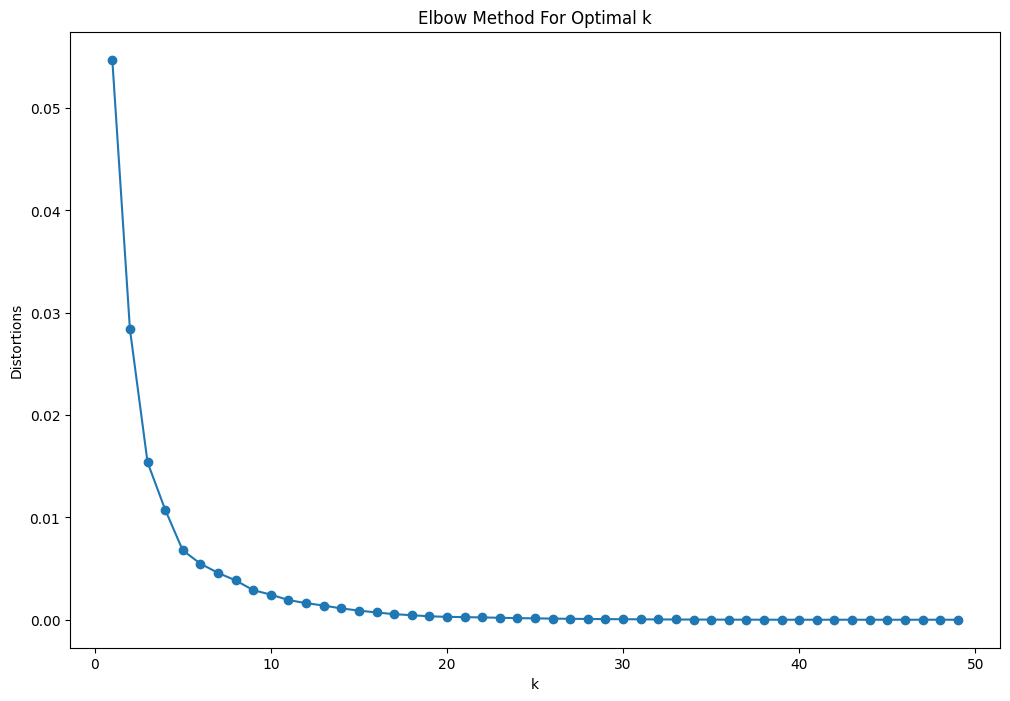

In [55]:
coords = top_restaurants[['Longitude','Latitude']]

distortions = []
K = range(1, min(len(coords), num_data_points))
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.show()

In [56]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(coords)
  labels = kmeans.labels_
  sil.append(silhouette_score(coords, labels, metric = 'euclidean'))
sil

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

[0.4777117363788118,
 0.5381663726394101,
 0.5767148412998963,
 0.5782703054713825,
 0.5792810684304125,
 0.5534012394685314,
 0.5074298601934527,
 0.45646461014915773,
 0.4451286350111968,
 0.4932994323520677,
 0.4892674389635269,
 0.48545777804863016,
 0.49251208627376,
 0.5409090046090573,
 0.5416527992836908,
 0.5788552522995388,
 0.5906113664622391,
 0.56132652791791,
 0.5557439112639764]

In [57]:
len(sil)

19

In [61]:
kmeans = KMeans(n_clusters=len(sil), init='k-means++' , n_init=10)
#kmeans = KMeans(n_clusters=len(sil), init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
  # Set n_init to a specific value


In [62]:
top_restaurants['cluster'] = kmeans.predict(top_restaurants[['Longitude','Latitude']])
top_restaurants.head(20)


,URL,SHOP_NAME,RATING,REVIEW_COUNT,LOCATION,TYPE,PLACE,IMG_SRC,Latitude,Longitude,Kochi,cluster
182,https://www.google.com/maps/place/The+Taapioca...,The Taapioca Restaurant,4.2,995,Kochi,Modern Indian restaurant,"Mylaady Chambers, Goshree Chathiyath Road, Pot...",https://lh5.googleusercontent.com/p/AF1QipPT1b...,10.004520,76.287751,True,12
248,https://www.google.com/maps/place/HAPPY+ROLLS/...,HAPPY ROLLS,4.4,96,Kochi,Restaurant,DOOR NO. CC8/1759,https://lh5.googleusercontent.com/p/AF1QipMhue...,9.952135,76.251767,True,10
60,https://www.google.com/maps/place/BTH+Harbourg...,BTH Harbourgate Restaurant,4.0,957,Kochi,Vegetarian,"24, 1347, Bristow Rd",https://lh5.googleusercontent.com/p/AF1QipPDyT...,9.961141,76.268162,True,15
6,https://www.google.com/maps/place/Be3+Resto+%2...,Be3 Resto & Cafe,4.1,943,Kochi,Family-friendly,"COPT Walkway Bridge, NH966B",https://lh5.googleusercontent.com/p/AF1QipO41B...,9.931271,76.278487,True,2
418,https://www.google.com/maps/place/Be3+Resto+%2...,Be3 Resto & Cafe,4.1,943,Kochi,Family-friendly,"COPT Walkway Bridge, NH966B",https://lh5.googleusercontent.com/p/AF1QipNlTX...,9.931271,76.278487,True,2
38,https://www.google.com/maps/place/Kashi+Art+Ca...,Kashi Art CafÃ©,4.3,9106,Kochi,Restaurant,"Burger St, near Police Station",https://lh5.googleusercontent.com/p/AF1QipPJyd...,9.966805,76.243123,True,8
125,https://www.google.com/maps/place/Chandrus+Res...,Chandrus Restaurant,4.4,91,Kochi,Vegetarian,Convent Rd,https://lh5.googleusercontent.com/p/AF1QipM5Op...,9.976813,76.282612,True,18
80,https://www.google.com/maps/place/Salt+n+Peppe...,Salt n Pepper.,3.5,91,Kochi,Seafood,"X68V+V96, Tower Rd",https://lh5.googleusercontent.com/p/AF1QipNL8-...,9.967151,76.243387,True,8
392,https://www.google.com/maps/place/Febina+Famil...,Febina Family Restaurant & Caterers,3.4,900,Kochi,Biryani,"W7P6+65V, P T Jacob Rd",https://lh5.googleusercontent.com/p/AF1QipMVdD...,9.935617,76.260419,True,11
265,https://www.google.com/maps/place/Vinayaka+Caf...,Vinayaka Cafe,5.0,9,Kochi,Restaurant,X64X+WRQ,https://lh5.googleusercontent.com/p/AF1QipPkj7...,9.957339,76.249620,True,10


In [63]:
top_restaurants['REVIEW_COUNT'] = pd.to_numeric(top_restaurants['REVIEW_COUNT'], errors='coerce')

import plotly.express as px
#px.set_mapbox_access_token("<Add your mapbox token here>")
fig=px.scatter_mapbox(top_restaurants,
                      lat=top_restaurants["Latitude"],
                      lon=top_restaurants["Longitude"], color=top_restaurants["cluster"],
                      size=top_restaurants['RATING'],
                      hover_data= ['SHOP_NAME', 'Longitude', 'Latitude'], zoom=10, width=1000, height=700,
                      title = 'TOP RATED RESTAURANTS '
                      )

fig.update_layout(mapbox_style="open-street-map")